**ANALISIS EXPLORATORIO DE DATOS (EDA)**

Este notebook utiliza varias librerías para analizar los datasets movies y credits para detectar relaciones, outliers, anomalías y patrones:

In [4]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud
import sweetviz as sv

1. Cargar y mostrar los datos: Muestra las primeras filas y la información general de los DataFrames

In [5]:
# Cargar los datos desde los archivos parquet
movies_df = pd.read_parquet('../Dataset/movies_df.parquet')
credits_cast_df = pd.read_parquet('../Dataset/credits_cast_df.parquet')
credits_crew_df = pd.read_parquet('../Dataset/credits_crew_df.parquet')

In [6]:
# Mostrar las primeras filas de cada DataFrame
print(movies_df.head())
print(credits_cast_df.head())
print(credits_crew_df.head())

       budget    id                                           overview  \
0  30000000.0   862  Led by Woody, Andy's toys live happily in his ...   
1  30000000.0   862  Led by Woody, Andy's toys live happily in his ...   
2  30000000.0   862  Led by Woody, Andy's toys live happily in his ...   
3  65000000.0  8844  When siblings Judy and Peter discover an encha...   
4  65000000.0  8844  When siblings Judy and Peter discover an encha...   

  popularity release_date      revenue      title  vote_average  vote_count  \
0  21.946943   1995-10-30  373554033.0  Toy Story           7.7      5415.0   
1  21.946943   1995-10-30  373554033.0  Toy Story           7.7      5415.0   
2  21.946943   1995-10-30  373554033.0  Toy Story           7.7      5415.0   
3  17.015539   1995-12-15  262797249.0    Jumanji           6.9      2413.0   
4  17.015539   1995-12-15  262797249.0    Jumanji           6.9      2413.0   

   belongs_to_collection_id belongs_to_collection_name  genres_id genres_name  \

In [7]:
# Información general de los DataFrames
print(movies_df.info())
print(credits_cast_df.info())
print(credits_crew_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91036 entries, 0 to 91035
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   budget                      91036 non-null  float64       
 1   id                          91036 non-null  object        
 2   overview                    89967 non-null  object        
 3   popularity                  91036 non-null  object        
 4   release_date                91036 non-null  datetime64[ns]
 5   revenue                     91036 non-null  float64       
 6   title                       91036 non-null  object        
 7   vote_average                91036 non-null  float64       
 8   vote_count                  91036 non-null  float64       
 9   belongs_to_collection_id    11077 non-null  float64       
 10  belongs_to_collection_name  11077 non-null  object        
 11  genres_id                   91036 non-null  int64     

2. Visualización de valores faltantes: Utiliza missingno para visualizar los valores faltantes en los DataFrames

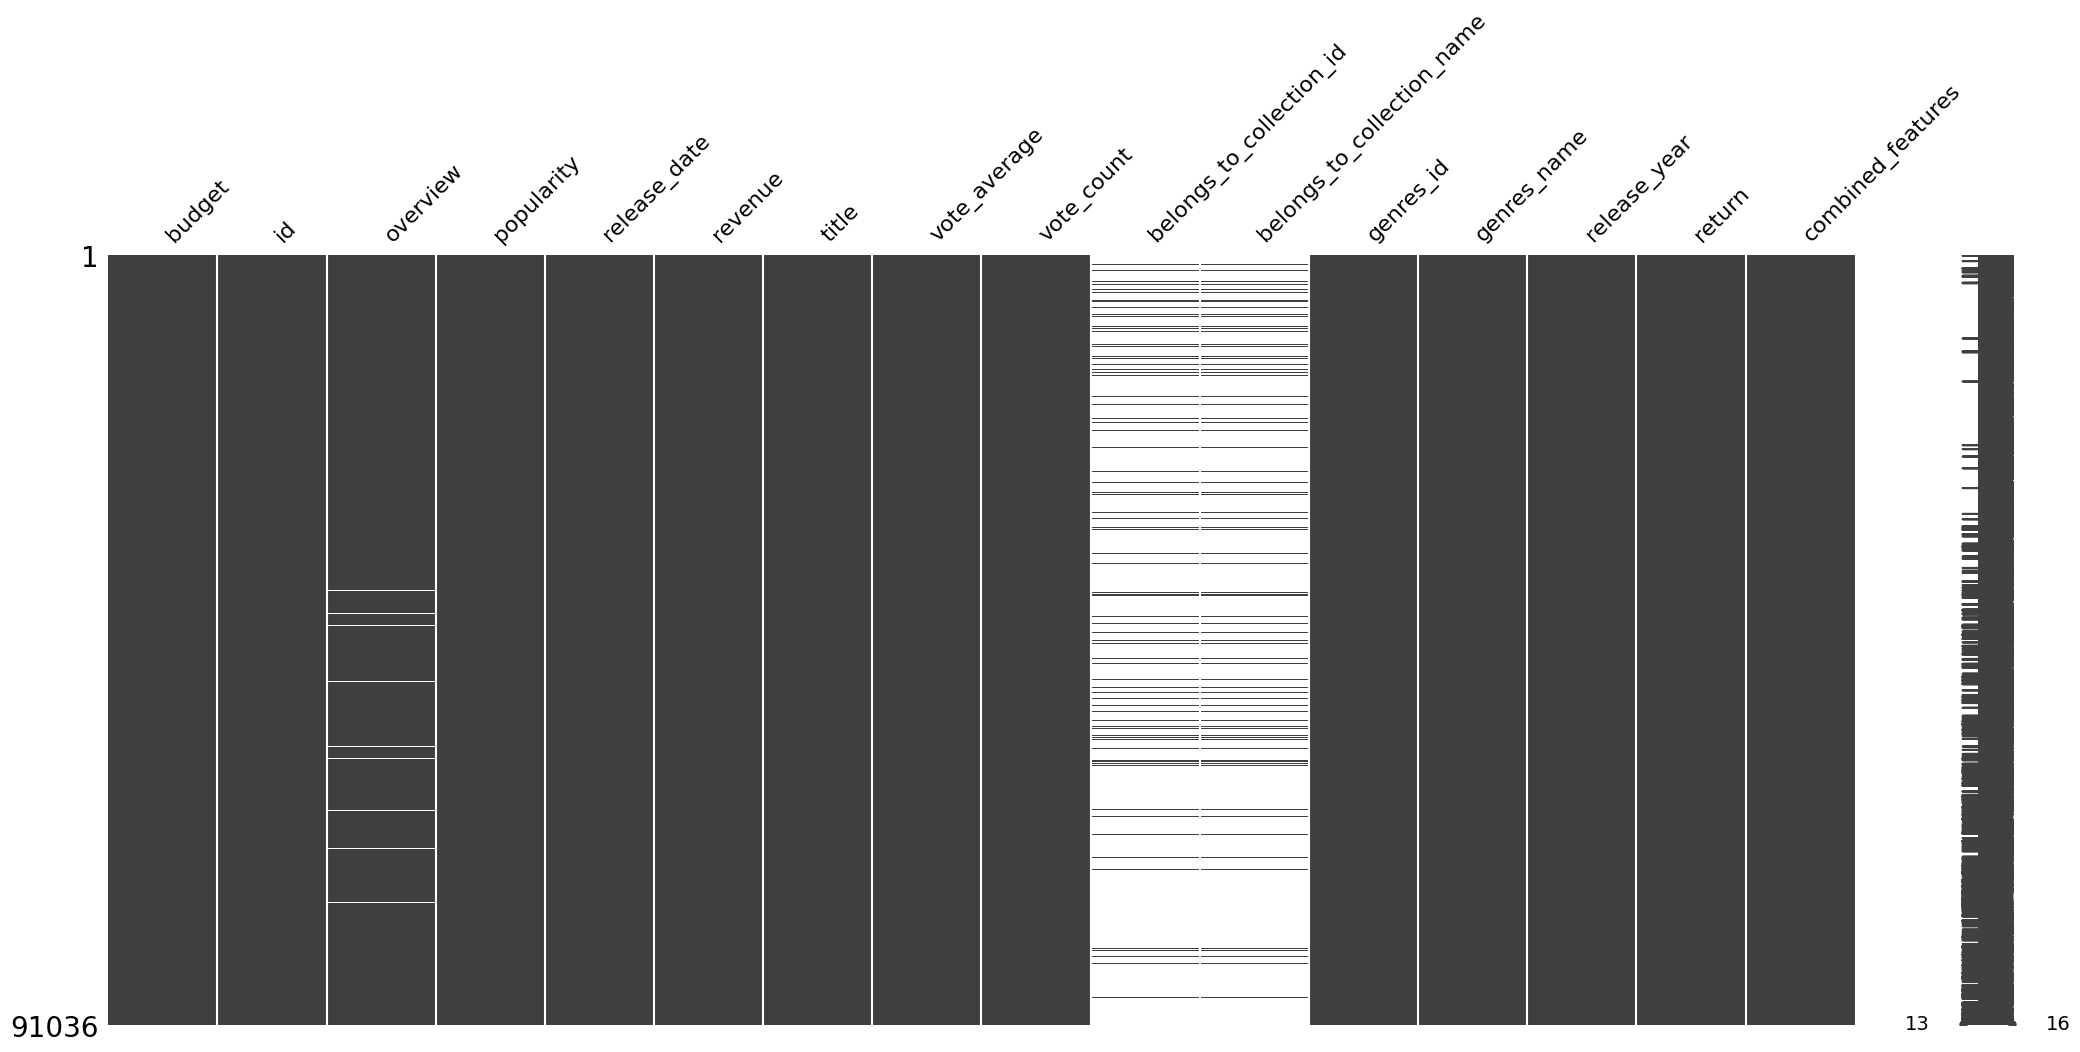

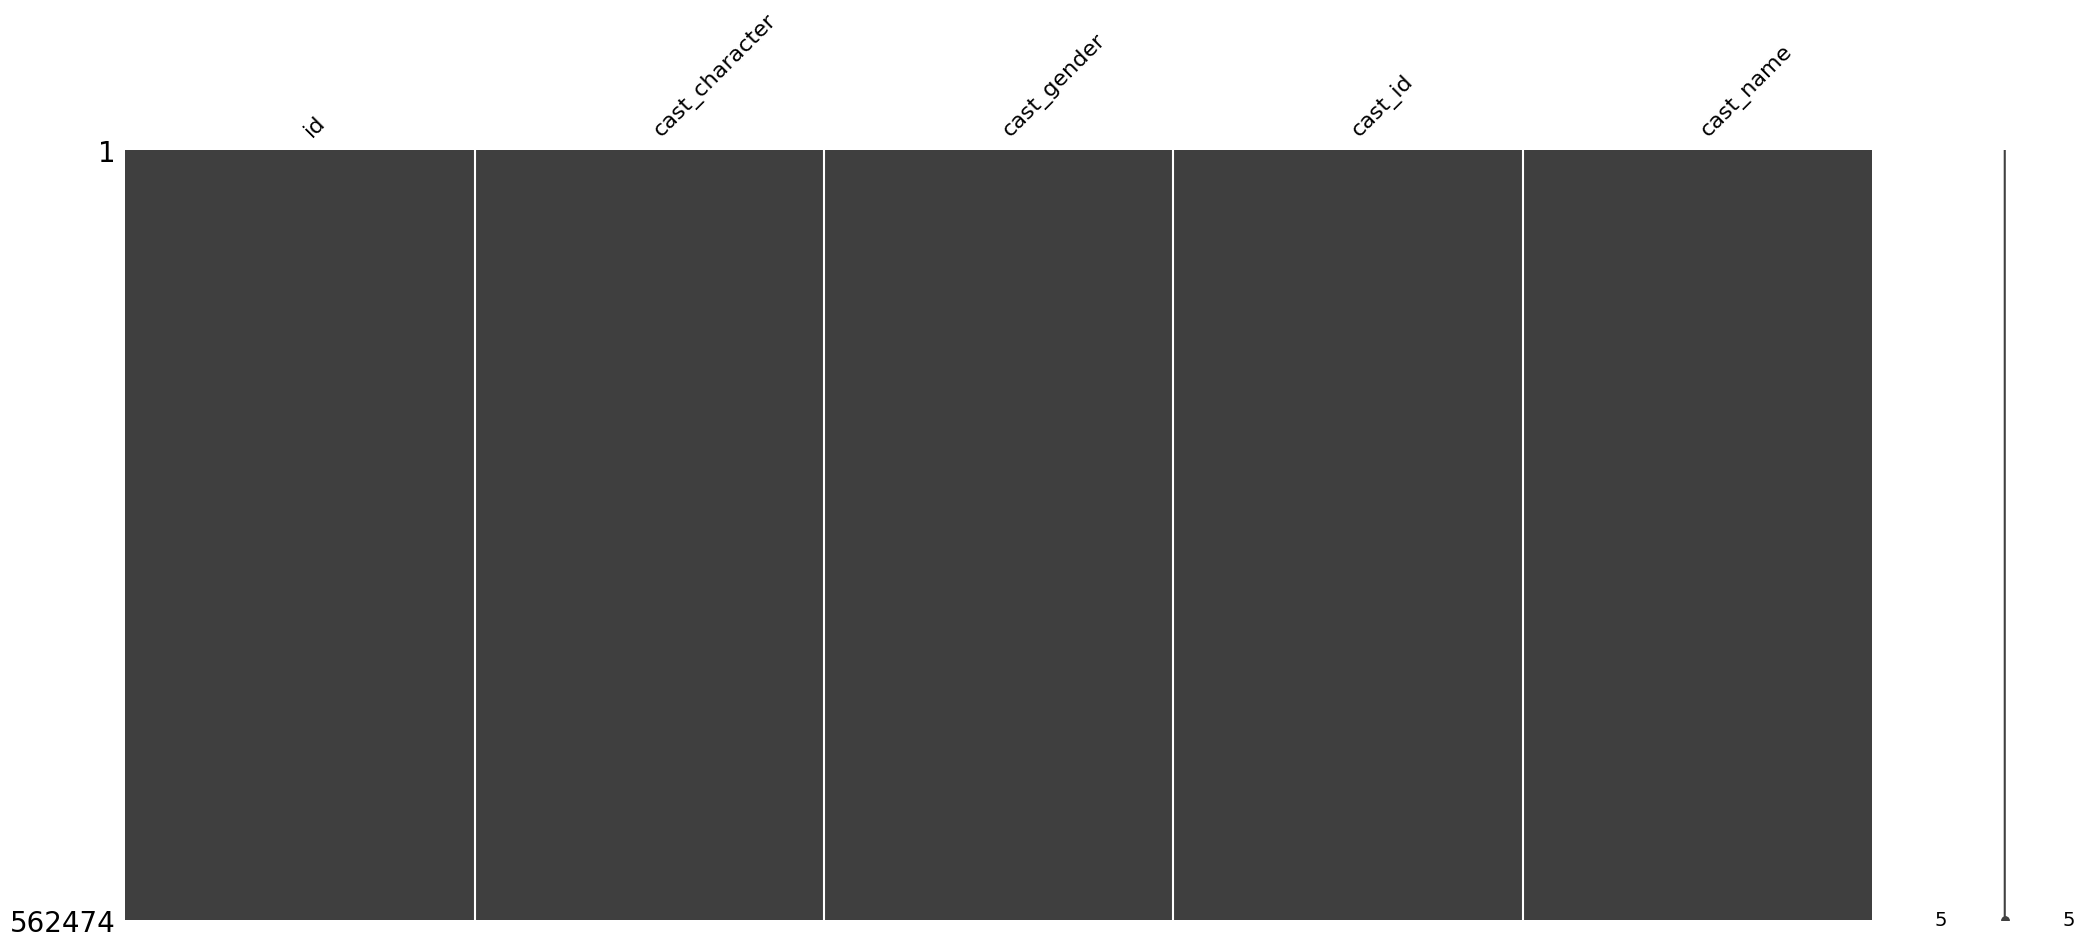

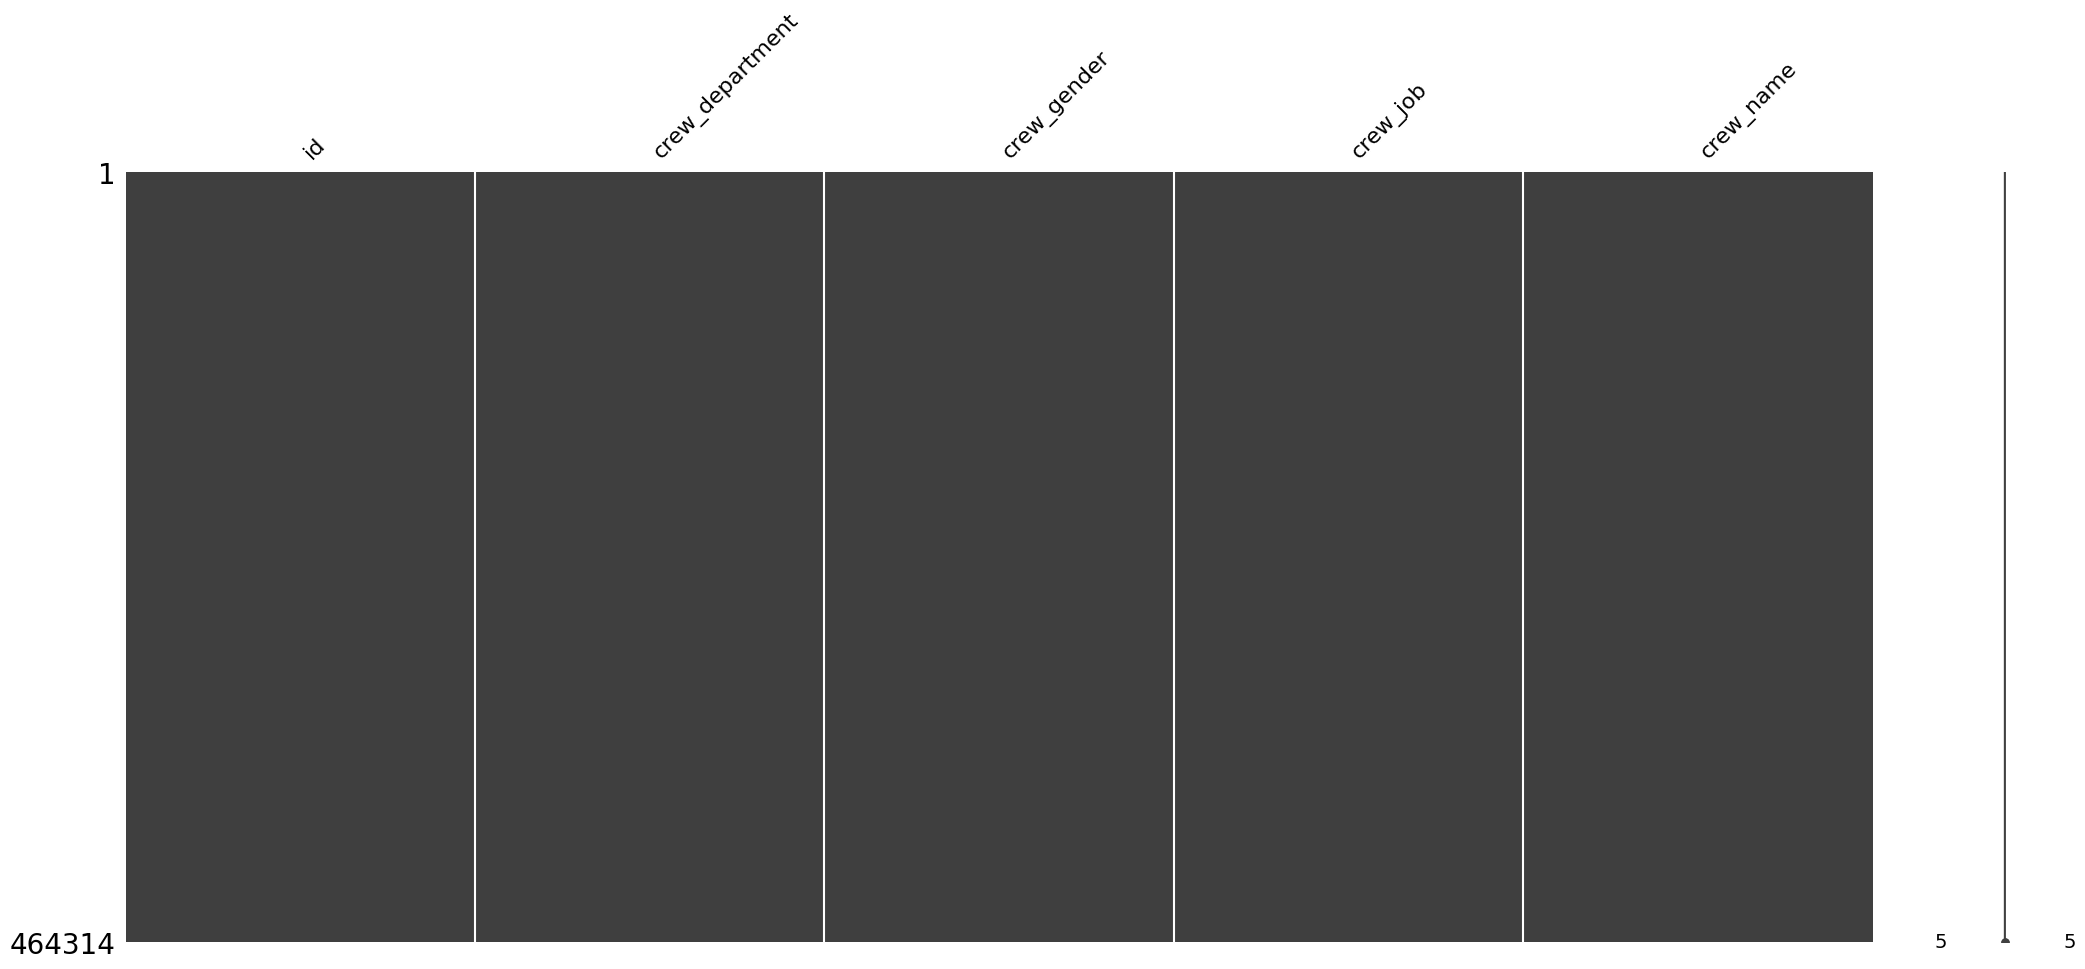

In [8]:
# Visualización de valores faltantes
msno.matrix(movies_df)
plt.show()

msno.matrix(credits_cast_df)
plt.show()

msno.matrix(credits_crew_df)
plt.show()

3. Descripción estadística: Muestra la descripción estadística de las variables numéricas

In [9]:
# Descripción estadística
print(movies_df.describe())
print(credits_cast_df.describe())
print(credits_crew_df.describe())

             budget                   release_date       revenue  \
count  9.103600e+04                          91036  9.103600e+04   
mean   6.129497e+06  1992-07-03 00:25:09.978470016  1.636123e+07   
min    0.000000e+00            1874-12-09 00:00:00  0.000000e+00   
25%    0.000000e+00            1979-07-27 00:00:00  0.000000e+00   
50%    0.000000e+00            2001-03-29 00:00:00  0.000000e+00   
75%    0.000000e+00            2010-06-03 00:00:00  0.000000e+00   
max    3.800000e+08            2020-12-16 00:00:00  2.787965e+09   
std    2.158474e+07                            NaN  8.058732e+07   

       vote_average    vote_count  belongs_to_collection_id     genres_id  \
count  91036.000000  91036.000000              11077.000000  91036.000000   
mean       5.743344    150.558933             176500.217297   2060.679720   
min        0.000000      0.000000                 10.000000     12.000000   
25%        5.200000      5.000000              65249.000000     18.000000   
50

4. Relación entre variables numéricas: Utiliza seaborn para visualizar la relación entre variables numéricas

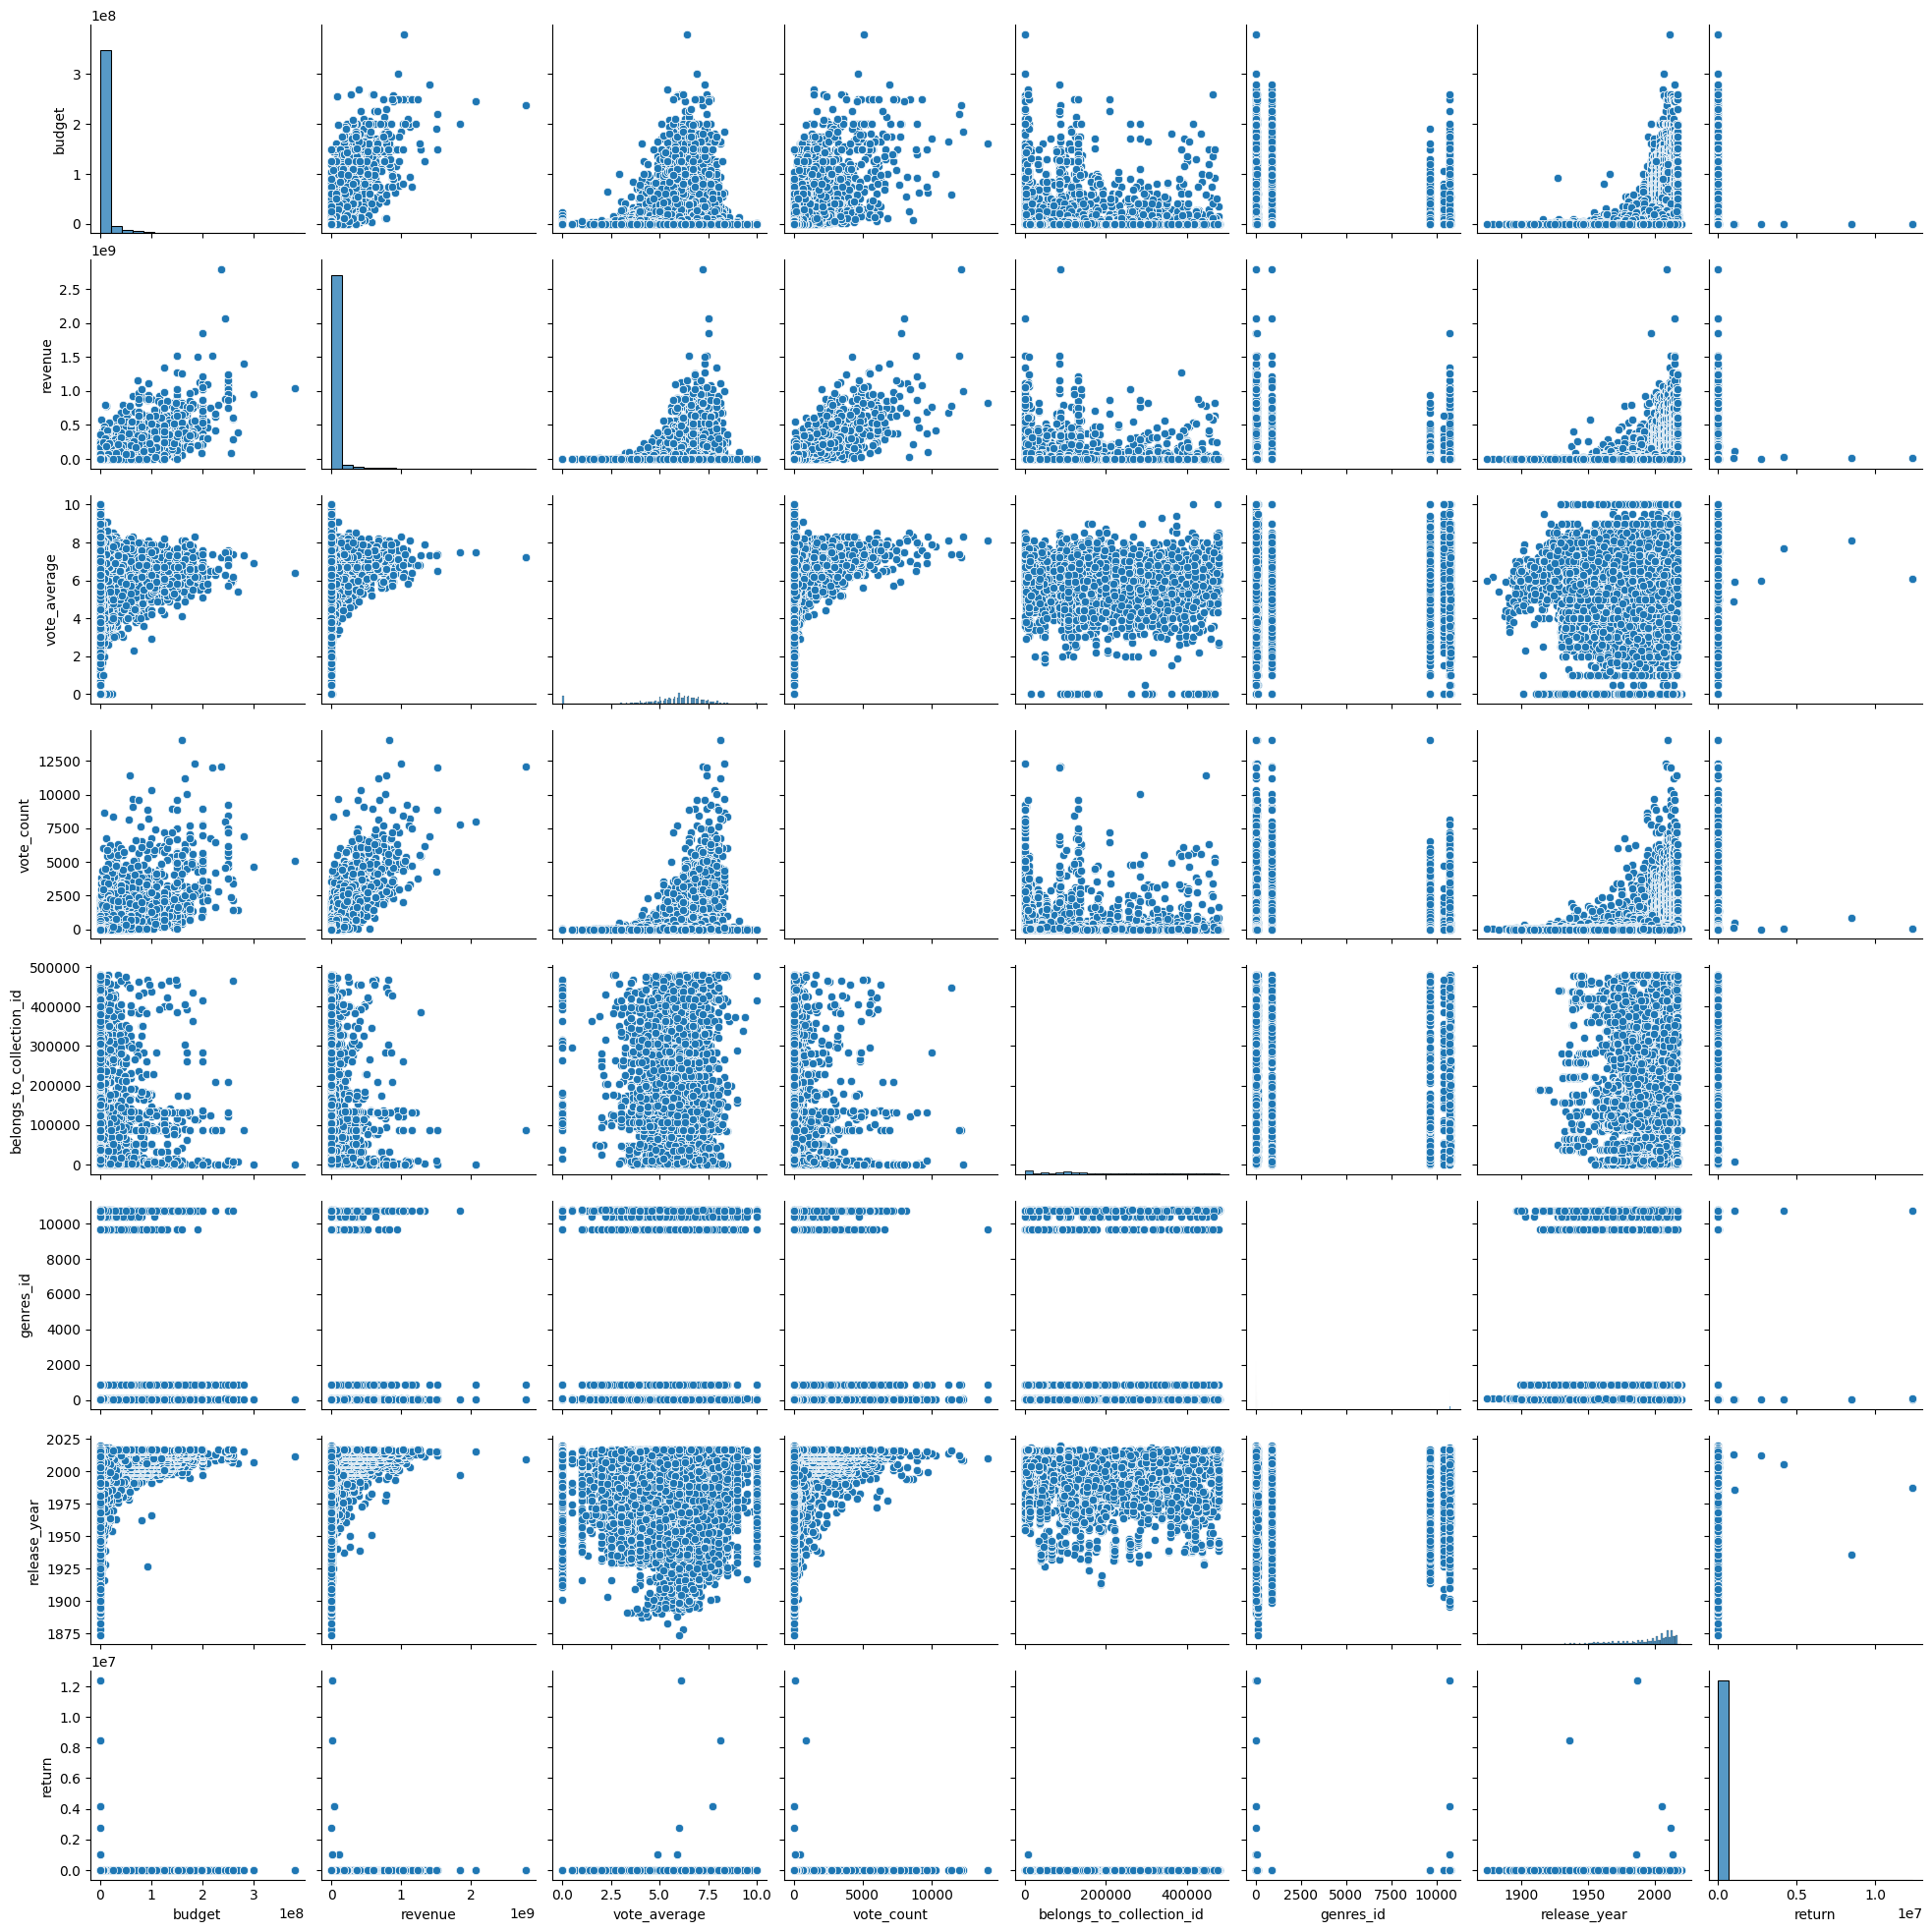

In [10]:
# Relación entre variables numéricas
sns.pairplot(movies_df)
plt.show()

5. Histograma y Boxplot: Visualiza la distribución de algunas columnas y detecta outliers

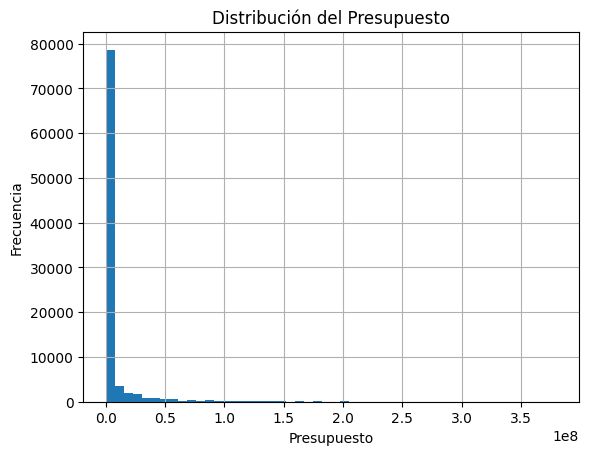

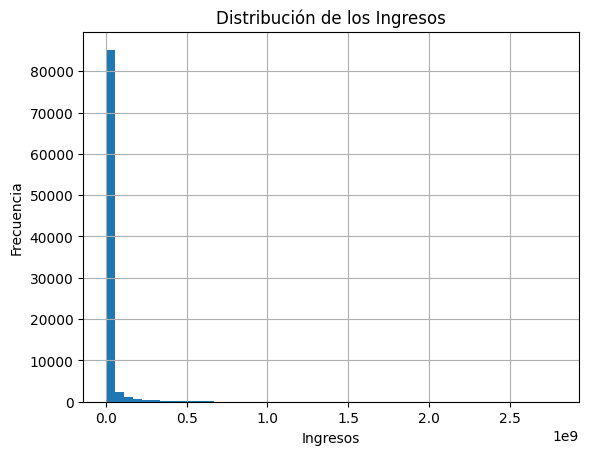

In [11]:
# Histograma de algunas columnas
movies_df['budget'].hist(bins=50)
plt.title('Distribución del Presupuesto')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.show()

movies_df['revenue'].hist(bins=50)
plt.title('Distribución de los Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()

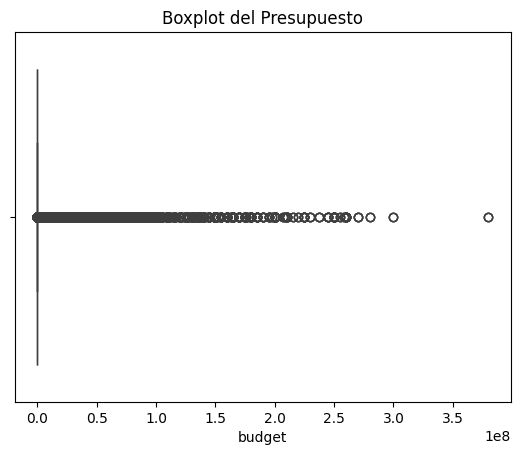

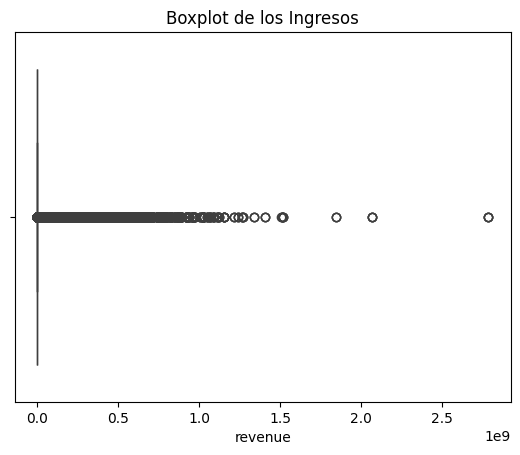

In [12]:
# Boxplot para detectar outliers en presupuesto e ingresos
sns.boxplot(x=movies_df['budget'])
plt.title('Boxplot del Presupuesto')
plt.show()

sns.boxplot(x=movies_df['revenue'])
plt.title('Boxplot de los Ingresos')
plt.show()

6. Nube de palabras: Genera una nube de palabras para los títulos de las películas.

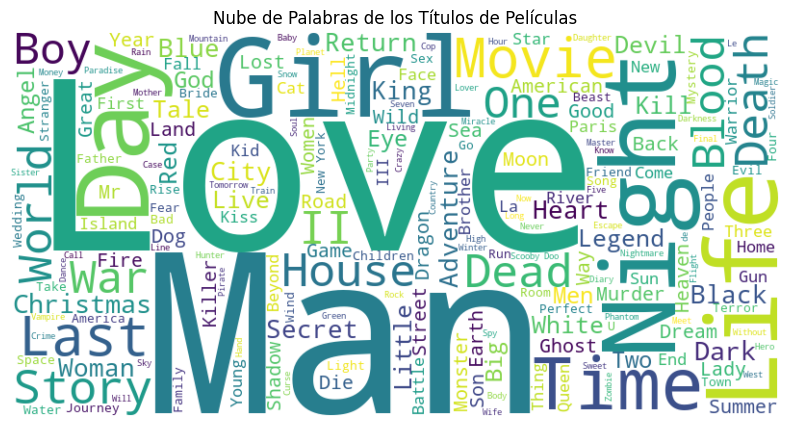

In [13]:
# Generación de nubes de palabras para los títulos de las películas
title_text = ' '.join(movies_df['title'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Títulos de Películas')
plt.show()

7. Distribución de géneros: Visualiza la distribución de géneros.

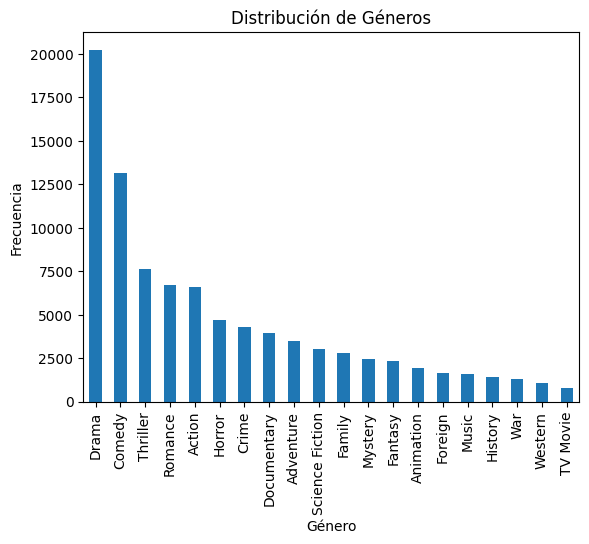

In [14]:
# Análisis de la distribución de géneros
movies_df['genres_name'].value_counts().plot(kind='bar')
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

8. Relación entre presupuesto e ingresos: Visualiza la relación entre el presupuesto y los ingresos de las películas.

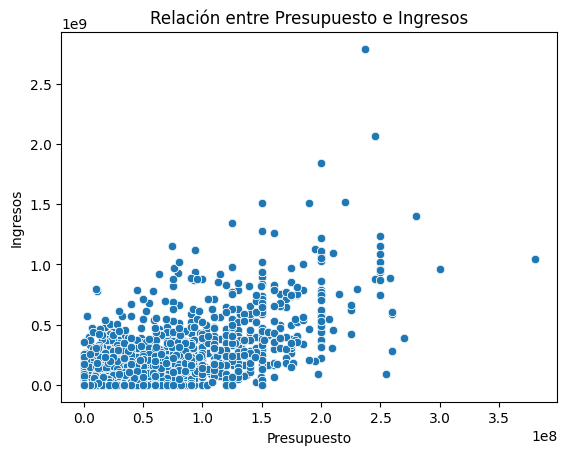

In [15]:
# Relación entre presupuesto e ingresos
sns.scatterplot(x='budget', y='revenue', data=movies_df)
plt.title('Relación entre Presupuesto e Ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.show()